In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import scipy.special as spsp

%matplotlib inline

# hypothesis testing for coin

In [52]:
def coin_type_I_error(N, n):
    """
    H0: the coin is fair. (p = 0.5)
    H1: the coin is not fair. (p != 0.5)
    
    hypothesis test:
    Out of N trials. If number of head is more than or equal to N - n or less than or equal to n,
    we reject the hypothesis.
    
    This function computes probability to make an type-I error.
    
    Args:
        N: total number of trials.
        n: number of tails.

    Output:
        wrapped func to print the result of the optimization
        
    """
    P = 0.
    p = 0.5
    for i in range(n + 1):
        P += spsp.comb(N, i, exact=False) * (p ** (N - i)) * (p ** i)
    return 2 * P

def coin_type_II_error(p, N, n):
    """
    H0: the coin is fair. (p = 0.5)
    H1: the coin is not fair. (p != 0.5)
    
    hypothesis test:
    Out of N trials. If number of head is more than or equal to N - n or less than or equal to n,
    we reject the hypothesis.
    
    This function computes probability to make an type-II error (power = 1 - beta).
    
    Args:
        p: probability to get the head.
        N: total number of trials
        n: number of tails.

    Output:
        wrapped func to print the result of the optimization
    
    """
    P = 0
    for i in range(n + 1):
        P += spsp.comb(N, i, exact=False) * (p ** (N - i)) * ((1 - p) ** i)
    for i in range(n + 1):
        P += spsp.comb(N, i, exact=False) * ((1 - p) ** (N - i)) * (p ** i)
    return 1 - P


In [53]:
p1 = coin_type_I_error(9, 1)
print("probability to make type-I error = {:1.4f}".format(p1))
p2 = coin_type_II_error(0.05, 9, 1)
print("probability to make type-II error = {:1.4f} when p = {}".format(p2, 0.05))

probability to make type-I error = 0.0391
probability to make type-II error = 0.0712 when p = 0.05


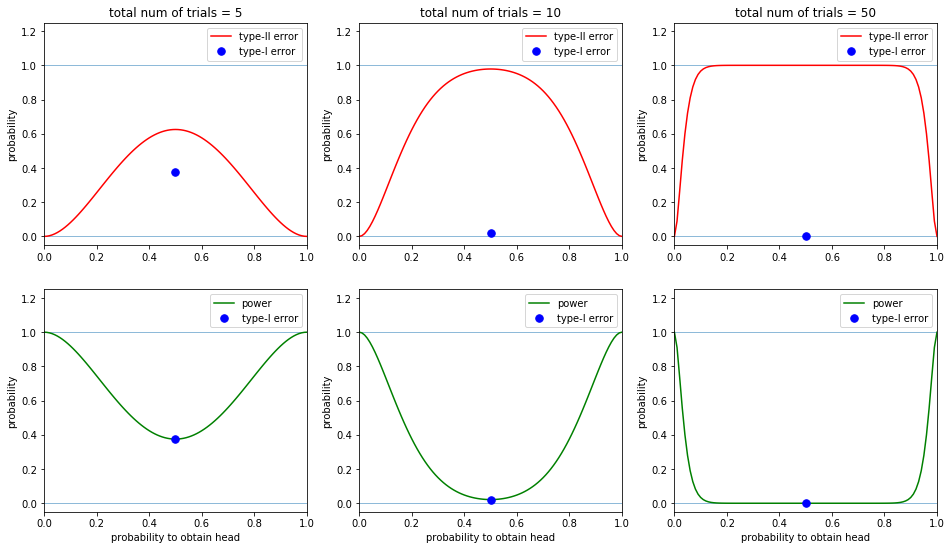

In [91]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

ps = np.arange(0, 1.01, 0.01)
Ns = [5, 10, 50]
for i, N in enumerate(Ns):
    p2s = np.zeros((ps.shape[0]))
    for j, p in enumerate(ps):
        p2s[j] = coin_type_II_error(p, N, 1)
    p1 = coin_type_I_error(N, 1)
    
    plt.subplot(2, 3, i + 1)
    plt.axhline(1, lw=0.5)
    plt.axhline(0, lw=0.5)
    plt.plot(ps, p2s, 'r-', label='type-II error')
    plt.plot(0.5, p1, 'b.', markersize=15, label='type-I error')
    #plt.xlabel('probability to obtain head')
    plt.ylabel('probability')
    plt.xlim((0., 1.))
    plt.ylim((-0.05, 1.25))
    plt.legend(loc='best')
    plt.title('total num of trials = {}'.format(N))
    
    plt.subplot(2, 3, i + 1 + 3)
    plt.axhline(1, lw=0.5)
    plt.axhline(0, lw=0.5)
    plt.plot(ps, np.ones((ps.shape[0])) - p2s, 'g-', label='power')
    plt.plot(0.5, p1, 'b.', markersize=15, label='type-I error')
    plt.xlabel('probability to obtain head')
    plt.ylabel('probability')
    plt.xlim((0., 1.))
    plt.ylim((-0.05, 1.25))
    plt.legend(loc='best')
    #plt.title('total num of trials = {}'.format(N))

# hypothesis testing - unknown $\mu$ and known $\sigma$